In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df = pd.read_csv('googleplaystore.csv')
df.head()

,Rating,App,Category,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,4.1,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,159,19M,"10,000+",Free,0,Everyone,Art & Design,07-Jan-18,1.0.0,4.0.3 and up
1,3.9,Coloring book moana,ART_AND_DESIGN,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,15-Jan-18,2.0.0,4.0.3 and up
2,4.7,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,01-Aug-18,1.2.4,4.0.3 and up
3,4.5,Sketch - Draw & Paint,ART_AND_DESIGN,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,08-Jun-18,Varies with device,4.2 and up
4,4.3,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,20-Jun-18,1.1,4.4 and up


# cleaning

In [4]:
df.describe()

,Rating,Reviews
count,9366.000000,1.084000e+04
mean,4.191757,4.441529e+05
std,0.515219,2.927761e+06
min,1.000000,0.000000e+00
25%,4.000000,3.800000e+01
50%,4.300000,2.094000e+03
75%,4.500000,5.477550e+04
max,5.000000,7.815831e+07


In [5]:
df.isna().sum()

Rating            1474
App                  0
Category             0
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          8
Android Ver          2
dtype: int64

In [6]:
df.dropna(inplace=True)

In [7]:
df.isna().sum()

Rating            0
App               0
Category          0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

In [8]:
df.duplicated().sum()

474

In [9]:
df.drop_duplicates(inplace=True)

In [10]:
df.head()
df['App'].duplicated().sum()
df['App'].drop_duplicates(inplace=True)


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8886 entries, 0 to 10839
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Rating          8886 non-null   float64
 1   App             8886 non-null   object 
 2   Category        8886 non-null   object 
 3   Reviews         8886 non-null   int64  
 4   Size            8886 non-null   object 
 5   Installs        8886 non-null   object 
 6   Type            8886 non-null   object 
 7   Price           8886 non-null   object 
 8   Content Rating  8886 non-null   object 
 9   Genres          8886 non-null   object 
 10  Last Updated    8886 non-null   object 
 11  Current Ver     8886 non-null   object 
 12  Android Ver     8886 non-null   object 
dtypes: float64(1), int64(1), object(11)
memory usage: 971.9+ KB


In [12]:
df['Price'] = df['Price'].apply(lambda x : x.replace('$',''))

In [13]:
df['Price'] = df['Price'].astype('float')

In [14]:
df.head()

,Rating,App,Category,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,4.1,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,159,19M,"10,000+",Free,0.0,Everyone,Art & Design,07-Jan-18,1.0.0,4.0.3 and up
1,3.9,Coloring book moana,ART_AND_DESIGN,967,14M,"500,000+",Free,0.0,Everyone,Art & Design;Pretend Play,15-Jan-18,2.0.0,4.0.3 and up
2,4.7,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,87510,8.7M,"5,000,000+",Free,0.0,Everyone,Art & Design,01-Aug-18,1.2.4,4.0.3 and up
3,4.5,Sketch - Draw & Paint,ART_AND_DESIGN,215644,25M,"50,000,000+",Free,0.0,Teen,Art & Design,08-Jun-18,Varies with device,4.2 and up
4,4.3,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,967,2.8M,"100,000+",Free,0.0,Everyone,Art & Design;Creativity,20-Jun-18,1.1,4.4 and up


# remove unwanted columns

In [15]:
df.drop(["Last Updated","Current Ver","Android Ver","Genres"],inplace=True,axis=1)

In [16]:
df['Size'] = df['Size'].apply(lambda x : x.replace('M',''))
df['Size'] = df['Size'].apply(lambda x : x.replace('Varies with device','0'))
df['Size'] = df['Size'].apply(lambda x : x.replace('k','1'))

In [17]:
df['Size'].astype('float')

0        19.0
1        14.0
2         8.7
3        25.0
4         2.8
         ... 
10833     2.6
10835    53.0
10836     3.6
10838     0.0
10839    19.0
Name: Size, Length: 8886, dtype: float64

In [18]:
df.head()

,Rating,App,Category,Reviews,Size,Installs,Type,Price,Content Rating
0,4.1,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,159,19,"10,000+",Free,0.0,Everyone
1,3.9,Coloring book moana,ART_AND_DESIGN,967,14,"500,000+",Free,0.0,Everyone
2,4.7,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,87510,8.7,"5,000,000+",Free,0.0,Everyone
3,4.5,Sketch - Draw & Paint,ART_AND_DESIGN,215644,25,"50,000,000+",Free,0.0,Teen
4,4.3,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,967,2.8,"100,000+",Free,0.0,Everyone


# type of apps on google play store

In [19]:
data1 = df['Type'].value_counts().reset_index()
data1

,Type,count
0,Free,8275
1,Paid,611


[Text(0, 0, '8275'), Text(0, 0, '611')]

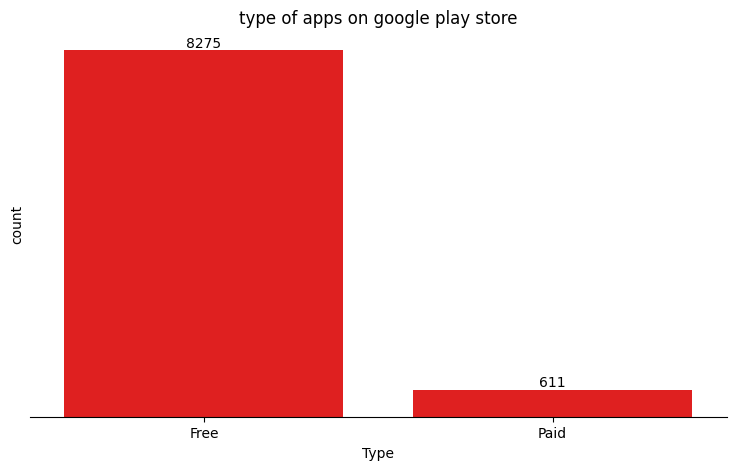

In [20]:
plt.figure(figsize=(9,5))
ax = sns.barplot(data1 , x='Type' , y='count',color='r')
plt.title('type of apps on google play store')
sns.despine(left=True)
plt.yticks([],[])
ax.bar_label(ax.containers[0])


# top 10 rating app

In [21]:
df['Rating'].value_counts().head(10)

Rating
4.4    1031
4.3    1016
4.5     976
4.2     887
4.6     768
4.1     656
4.0     538
4.7     484
3.9     372
3.8     293
Name: count, dtype: int64

In [22]:
df['App'].duplicated().sum()

696

In [23]:
df['App'] = df['App'].drop_duplicates()
df.dropna(inplace=True)

In [24]:
data2 = df[['App','Reviews']].nlargest(10,'Reviews')
data2

,App,Reviews
2544,Facebook,78158306
336,WhatsApp Messenger,69119316
2545,Instagram,66577313
335,Messenger – Text and Video Chat for Free,56642847
1670,Clash of Clans,44891723
4005,Clean Master- Space Cleaner & Antivirus,42916526
1654,Subway Surfers,27722264
3665,YouTube,25655305
7536,"Security Master - Antivirus, VPN, AppLock, Boo...",24900999
1660,Clash Royale,23133508


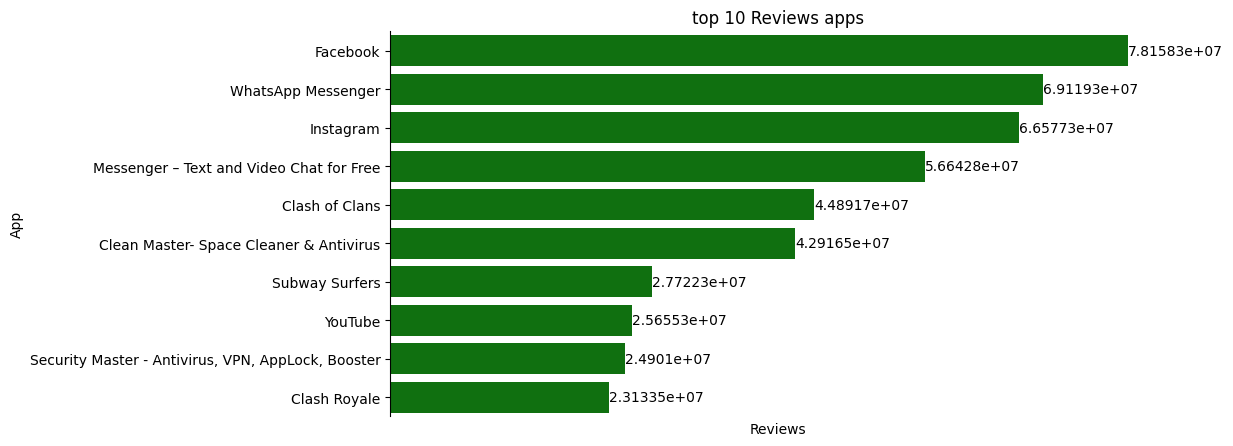

In [25]:
plt.figure(figsize=(10,5))
ax = sns.barplot(data2 , x='Reviews' , y='App',color='green')
plt.title('top 10 Reviews apps')
sns.despine(bottom=True)
plt.xticks([],[])
ax.bar_label(ax.containers[0]);

In [26]:
df.head()

,Rating,App,Category,Reviews,Size,Installs,Type,Price,Content Rating
0,4.1,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,159,19,"10,000+",Free,0.0,Everyone
1,3.9,Coloring book moana,ART_AND_DESIGN,967,14,"500,000+",Free,0.0,Everyone
2,4.7,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,87510,8.7,"5,000,000+",Free,0.0,Everyone
3,4.5,Sketch - Draw & Paint,ART_AND_DESIGN,215644,25,"50,000,000+",Free,0.0,Teen
4,4.3,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,967,2.8,"100,000+",Free,0.0,Everyone


In [27]:
df['Installs'] = df['Installs'].apply(lambda x :x.replace('+',''))
df['Installs'] = df['Installs'].apply(lambda x :x.replace(',',''))

In [28]:
df['Installs'] = df['Installs'].astype('float')

In [29]:
data3 = df[['App','Installs']].nlargest(10,'Installs')
data3

,App,Installs
152,Google Play Books,1.000000e+09
335,Messenger – Text and Video Chat for Free,1.000000e+09
336,WhatsApp Messenger,1.000000e+09
338,Google Chrome: Fast & Secure,1.000000e+09
340,Gmail,1.000000e+09
341,Hangouts,1.000000e+09
391,Skype - free IM & video calls,1.000000e+09
865,Google Play Games,1.000000e+09
1654,Subway Surfers,1.000000e+09
2544,Facebook,1.000000e+09


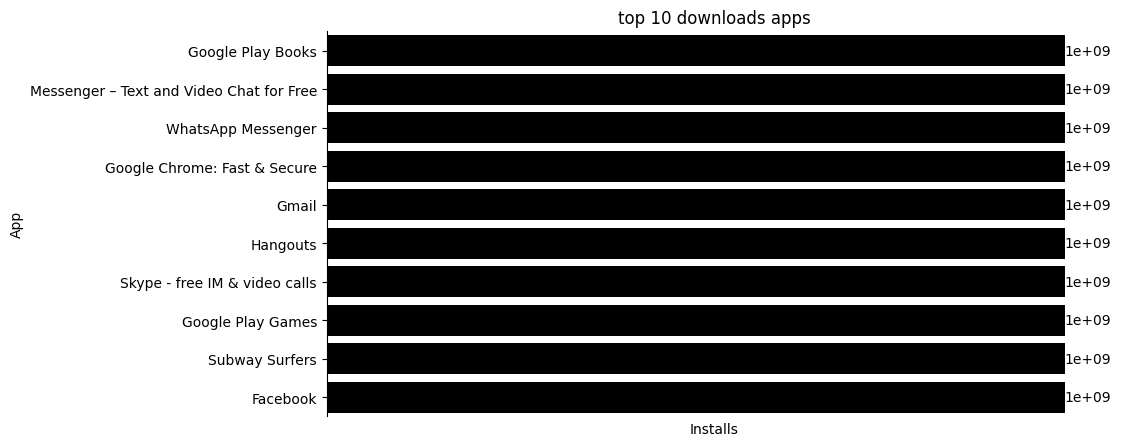

In [30]:
plt.figure(figsize=(10,5))
ax = sns.barplot(data3,y='App',x='Installs',color='black')
plt.title('top 10 downloads apps')
sns.despine(bottom=True)
plt.xticks([],[])
ax.bar_label(ax.containers[0]);

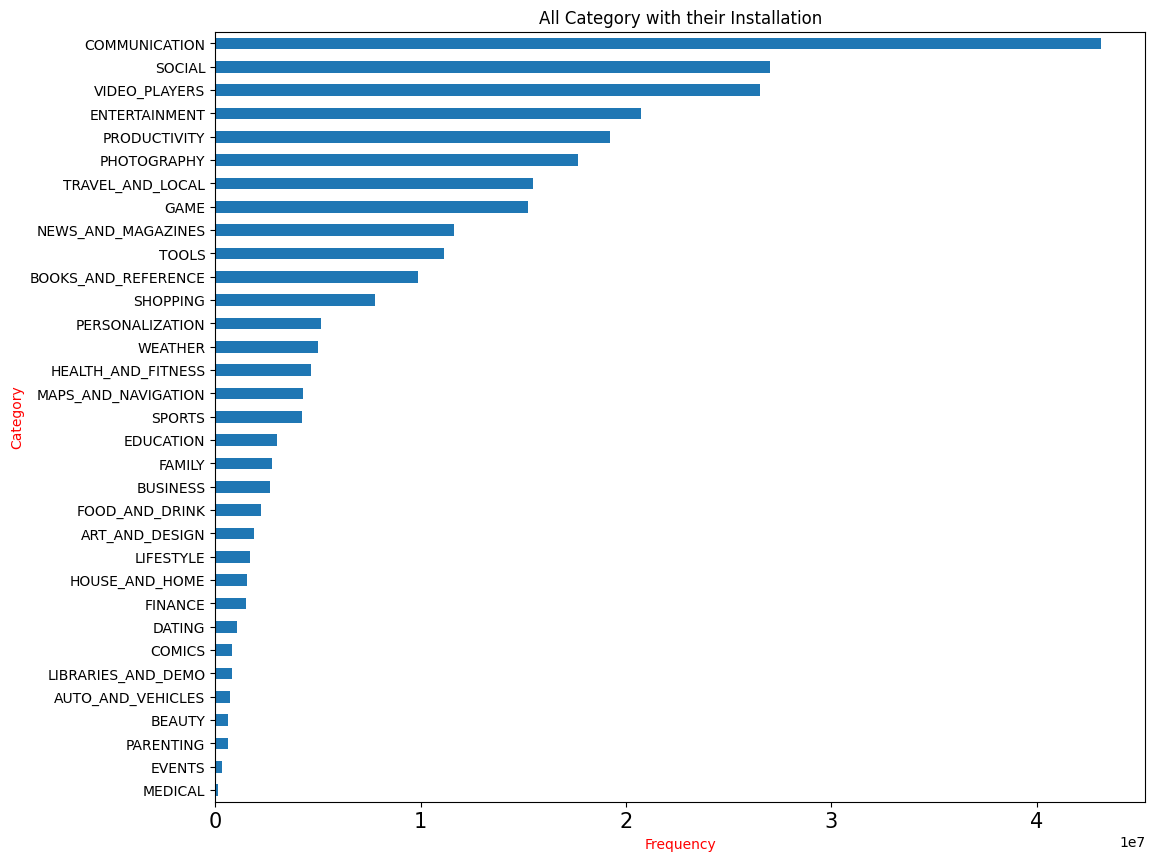

In [34]:
plt.figure(figsize=(12,10))
df.groupby('Category')['Installs'].mean().round(0).sort_values(ascending=True).plot(kind="barh")
plt.xticks(size=15)
plt.xlabel("Frequency",c="r")
plt.ylabel("Category",c="r")
plt.title("All Category with their Installation",c="black")
plt.show()

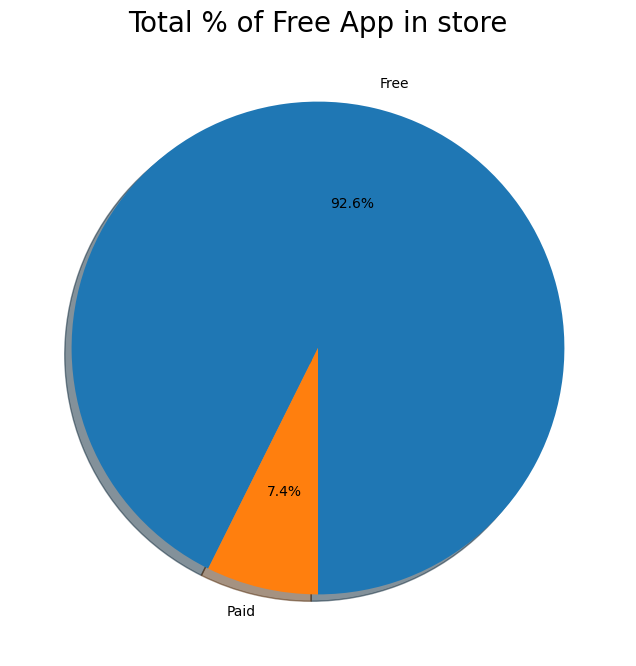

In [35]:
plt.figure(figsize=(8,8))
labels =df['Type'].value_counts(sort = True).index
sizes = df['Type'].value_counts(sort = True)
plt.pie(sizes, labels=labels,autopct='%1.1f%%', shadow=True, startangle=270,)
plt.title('Total % of Free App in store',size = 20)
plt.show()

C:\Users\mo12g\AppData\Local\Temp\ipykernel_18860\32328455.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Rating'],color='r',kde_kws={'linewidth':3,'color':'b'});


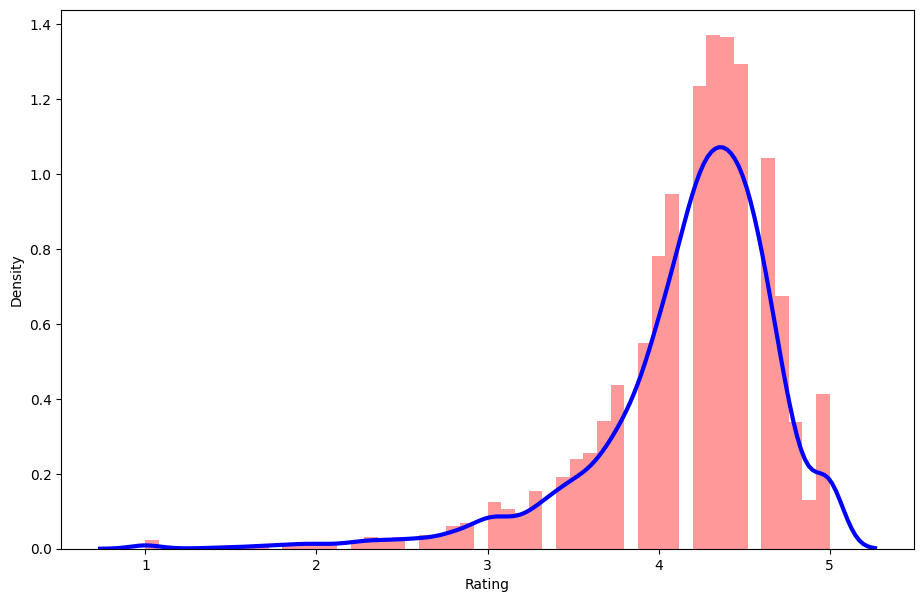

In [39]:
plt.figure(figsize=(11,7))
plt.subplot(1,1,1)
sns.distplot(df['Rating'],color='r',kde_kws={'linewidth':3,'color':'b'});